In [1]:
import pandas as pd
import numpy as np

from requests import get
from bs4 import BeautifulSoup
#import acquire
import requests
import prepare

import nltk
from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (13, 7))
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings("ignore")

/usr/local/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df1 = pd.read_json("data.json")
df = df1.copy()

In [5]:
df.head(10)

,repo,language,readme_contents
0,/redux-saga/redux-saga,JavaScript,<img src='https://redux-saga.js.org/img/Redux-...
1,/guzzle/guzzle,PHP,![Guzzle](.github/logo.png?raw=true)\n\n# Guzz...
2,/uikit/uikit,HTML,[![uikit banner](https://cloud.githubuserconte...
3,/JacksonTian/fks,JavaScript,Frontend Knowledge Structure\n========\n## Ori...
4,/LingCoder/OnJava8,None,# 《On Java 8》中文版\n\n## 最新动态\n\n《ON JAVA 中文版》终于...
5,/android/sunflower,Kotlin,# Android Sunflower with Compose\n\nA gardenin...
6,/ipader/SwiftGuide,Swift,Swift 开源精选\n===\n 自 2014年 WWDC 发布 Swift 语言以来，...
7,/Tencent/vConsole,TypeScript,English | [简体中文](./README_CN.md)\n\nvConsole\n...
8,/kriskowal/q,JavaScript,\n## Note\n\nPlease consider using [JavaScript...
9,/geeeeeeeeek/electronic-wechat,JavaScript,"<img src=""assets/icon.png"" alt=""logo"" height=""..."


In [6]:
df.shape

(1000, 3)

In [7]:
df.language.value_counts(dropna = False)

JavaScript          249
Python              227
Java                214
Ruby                204
None                 19
TypeScript           17
C++                  11
Go                   10
PHP                   7
Kotlin                5
C                     4
CSS                   4
Rust                  4
HTML                  3
C#                    3
Swift                 3
Objective-C           3
Shell                 2
TeX                   2
Vue                   2
Dart                  2
Jupyter Notebook      2
Vim Script            1
Haskell               1
ActionScript          1
Name: language, dtype: int64

In [8]:
df = df[df.language != "None"]

In [9]:
df =df.dropna()

In [10]:

df.isnull().any()

repo               False
language           False
readme_contents    False
dtype: bool

In [11]:
len(df)

981

In [12]:
df["clean"] = df.readme_contents.apply(prepare.basic_clean).apply(prepare.tokenize)


#create column that holds stemmed up column from clean column
df["stemmed"] = df.clean.apply(prepare.stem)
#create column that holds lemmatize values
df["lemmatized"] = df.clean.apply(prepare.lemmatize).apply(prepare.remove_stopwords)


In [13]:
df.head(5)

,repo,language,readme_contents,clean,stemmed,lemmatized
0,/redux-saga/redux-saga,JavaScript,<img src='https://redux-saga.js.org/img/Redux-...,img src ' httpsreduxsagajsorgimgreduxsagalogol...,img src ' httpsreduxsagajsorgimgreduxsagalogol...,img src ' httpsreduxsagajsorgimgreduxsagalogol...
1,/guzzle/guzzle,PHP,![Guzzle](.github/logo.png?raw=true)\n\n# Guzz...,guzzlegithublogopngrawtrue\n\n guzzle php http...,guzzlegithublogopngrawtrue\n\n guzzl php http ...,guzzlegithublogopngrawtrue\n\n guzzle php http...
2,/uikit/uikit,HTML,[![uikit banner](https://cloud.githubuserconte...,uikit bannerhttpscloudgithubusercontentcomasse...,uikit bannerhttpscloudgithubusercontentcomasse...,uikit bannerhttpscloudgithubusercontentcomasse...
3,/JacksonTian/fks,JavaScript,Frontend Knowledge Structure\n========\n## Ori...,frontend knowledge structure\n\n original purp...,frontend knowledg structure\n\n origin purpose...,frontend knowledge structure\n\n original purp...
5,/android/sunflower,Kotlin,# Android Sunflower with Compose\n\nA gardenin...,android sunflower with compose\n\na gardening ...,android sunflow with compose\n\na garden app i...,android sunflower compose\n\na gardening app i...


In [14]:
df.lemmatized.head()

0    img src ' httpsreduxsagajsorgimgreduxsagalogol...
1    guzzlegithublogopngrawtrue\n\n guzzle php http...
2    uikit bannerhttpscloudgithubusercontentcomasse...
3    frontend knowledge structure\n\n original purp...
5    android sunflower compose\n\na gardening app i...
Name: lemmatized, dtype: object

In [15]:
df.language.unique()

array(['JavaScript', 'PHP', 'HTML', 'Kotlin', 'Swift', 'TypeScript',
       'Java', 'Vim Script', 'C++', 'C', 'Python', 'Go', 'C#', 'Rust',
       'Shell', 'TeX', 'Haskell', 'CSS', 'Objective-C', 'ActionScript',
       'Vue', 'Dart', 'Jupyter Notebook', 'Ruby'], dtype=object)

In [16]:
JavaScript_words = ' '.join(df[df.language == "JavaScript"]["lemmatized"])
Python_words= ' '.join(df[df.language == "Python"]["lemmatized"])
Java_words = ' '.join(df[df.language == "Java"]["lemmatized"])
ruby_words = " ".join(df[df.language == "Ruby"]["lemmatized"])
other_words = ' '.join(df[(df.language!= "JavoaScript")&(df.language!= "Python")&(df.language !="Go")]["lemmatized"])
all_words = ' '.join(df.lemmatized)

In [17]:
df.language.value_counts(dropna = False).head(5)

JavaScript    249
Python        227
Java          214
Ruby          204
TypeScript     17
Name: language, dtype: int64

In [18]:
JavaScript_freq = pd.Series(JavaScript_words.split()).value_counts()
Python_freq = pd.Series(Python_words.split()).value_counts()
Java_words = pd.Series(Java_words.split()).value_counts()
ruby_words = pd.Series(ruby_words.split()).value_counts()
other_words = pd.Series(other_words.split()).value_counts()
    
all_words = pd.Series(all_words.split()).value_counts()

In [19]:
word_counts = pd.concat([JavaScript_freq,Python_freq, Java_words, ruby_words, other_words, all_words], axis = 1).fillna(0).astype(int)
word_counts.columns = ["javascript","python","java","ruby","other","all"]
word_counts.head()

,javascript,python,java,ruby,other,all
',7639,5500,1609,8398,19073,24658
javascript,1634,73,24,138,1863,1941
use,1318,1209,644,1559,3859,5084
source,1257,341,159,292,1953,2315
file,1115,970,415,1109,2925,3917


In [20]:
# sort by 'all'

word_counts.sort_values('all', ascending=False).head(20)

,javascript,python,java,ruby,other,all
',7639,5500,1609,8398,19073,24658
use,1318,1209,644,1559,3859,5084
file,1115,970,415,1109,2925,3917
using,885,880,399,883,2436,3338
the,700,756,324,1208,2421,3211
ruby,101,37,6,2709,2842,2879
1,686,891,269,600,1829,2807
code,688,651,279,828,2129,2797
data,432,963,364,661,1786,2767
a,1079,574,355,535,2158,2767


<AxesSubplot:>

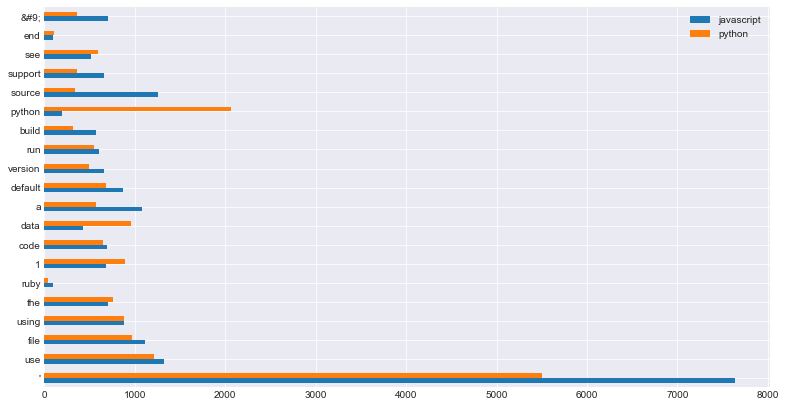

In [21]:
word_counts.sort_values(by = "all", ascending = False)[["javascript","python"]]\
.head(20).plot.barh()

<AxesSubplot:>

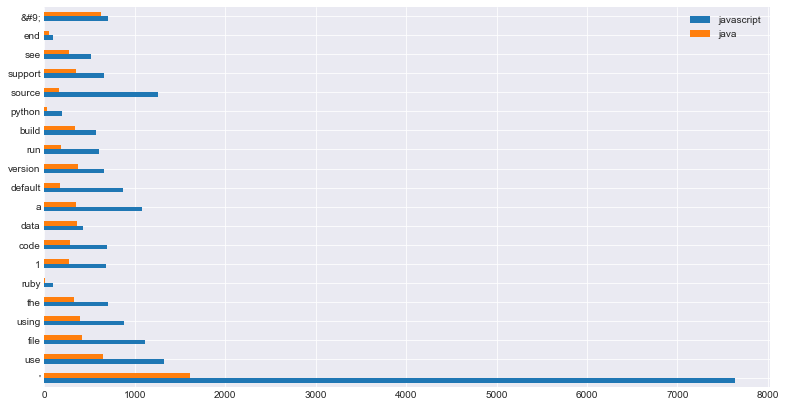

In [22]:
word_counts.sort_values(by = "all", ascending = False)[["javascript","java"]]\
.head(20).plot.barh()

<AxesSubplot:>

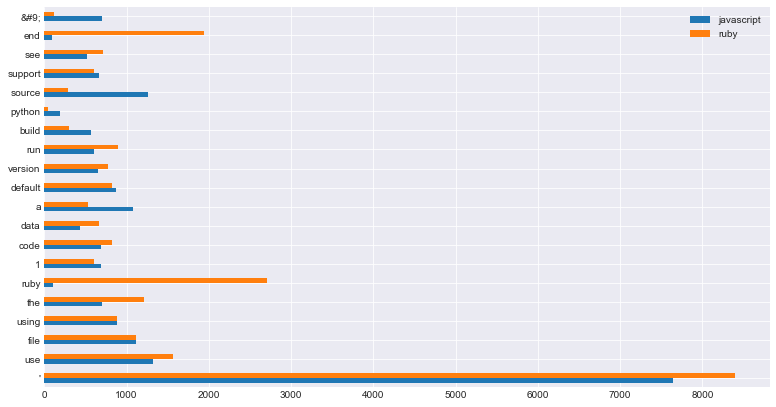

In [23]:
word_counts.sort_values(by = "all", ascending = False)[["javascript","ruby"]]\
.head(20).plot.barh()

<AxesSubplot:>

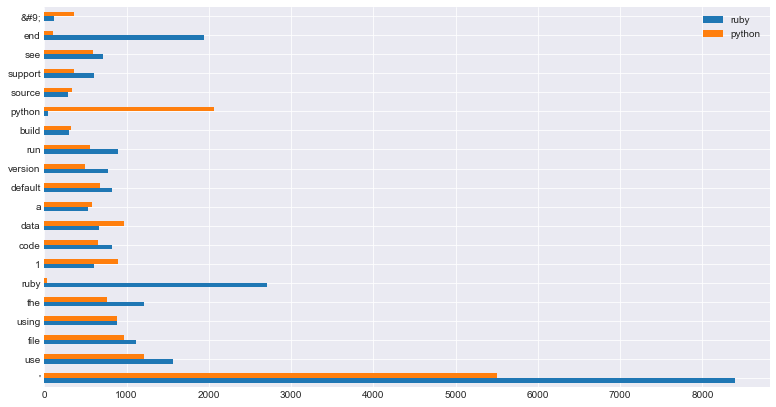

In [24]:
word_counts.sort_values(by = "all", ascending = False)[["ruby","python"]]\
.head(20).plot.barh()

<AxesSubplot:>

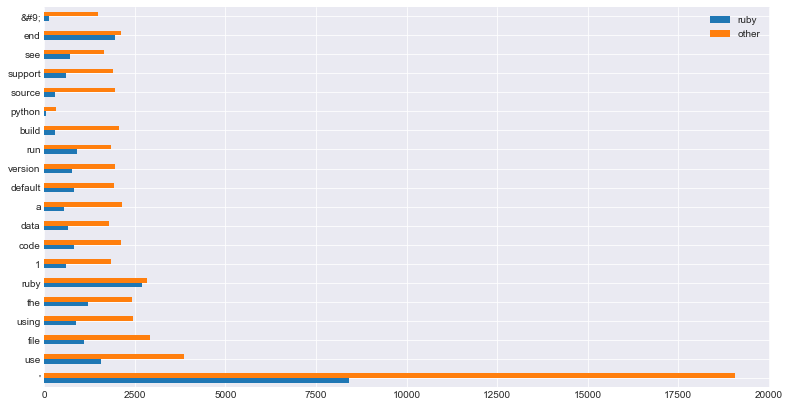

In [25]:
word_counts.sort_values(by = "all", ascending = False)[["ruby","other"]]\
.head(20).plot.barh()

<AxesSubplot:>

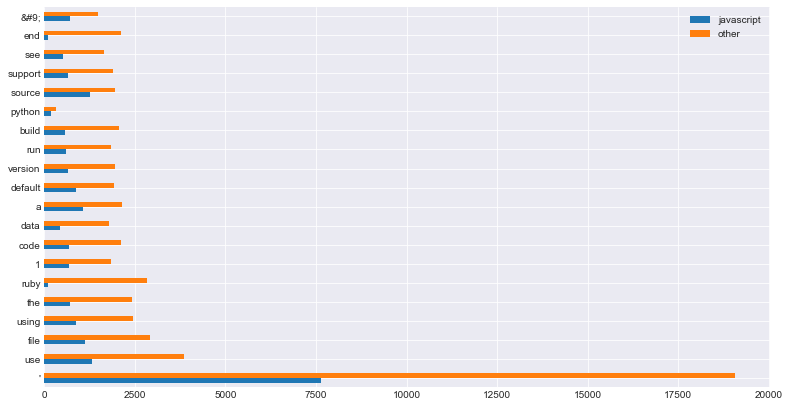

In [26]:
word_counts.sort_values(by = "all", ascending = False)[["javascript","other"]]\
.head(20).plot.barh()

biogram

In [27]:
JavaScript_biogram = pd.Series(nltk.ngrams(JavaScript_words,2)).value_counts().head(20)
Python_biogram = pd.Series(nltk.ngrams(Python_words,2)).value_counts().head(20)
Java_biogram  = pd.Series(nltk.ngrams(Java_words,2)).value_counts().head(20)
ruby_biogram = pd.Series(nltk.ngrams(ruby_words,2)).value_counts().head(20)
other_biogram = pd.Series(nltk.ngrams(other_words,2)).value_counts().head(20)
all_words = ' '.join(df.lemmatized)

<AxesSubplot:>

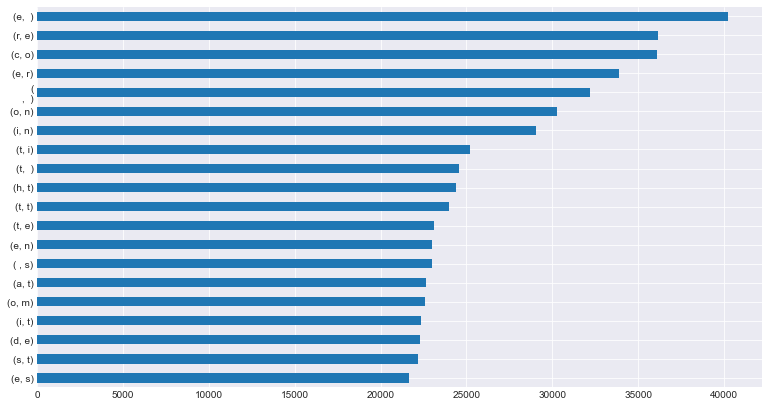

In [28]:
JavaScript_biogram.sort_values(ascending = True).plot.barh()

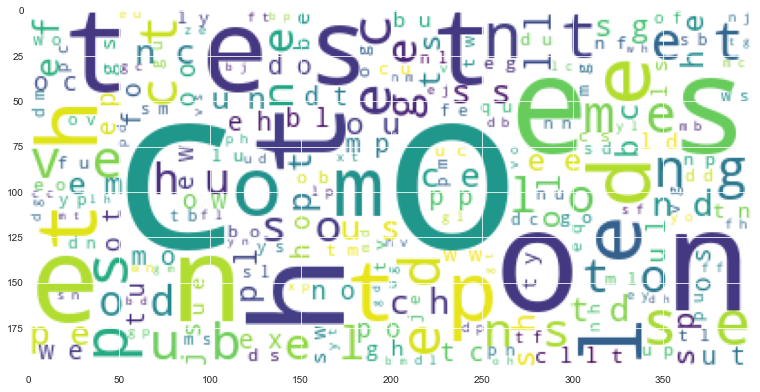

In [29]:
#word cloud for javascript
img = WordCloud(background_color='white').generate(' '.join(JavaScript_words))
plt.imshow(img)

<AxesSubplot:>

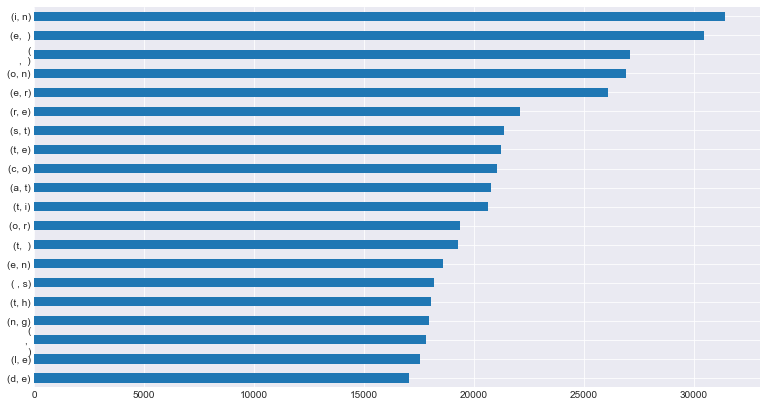

In [30]:
Python_biogram.sort_values(ascending = True).plot.barh()

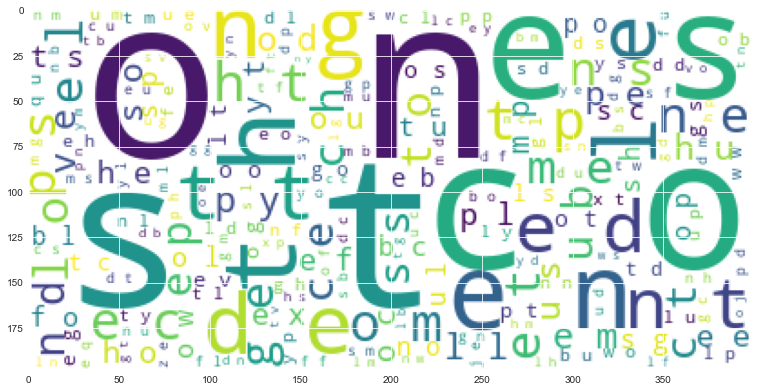

In [31]:
#word cloud for pythom
img = WordCloud(background_color='white').generate(' '.join(Python_words))
plt.imshow(img)

<AxesSubplot:>

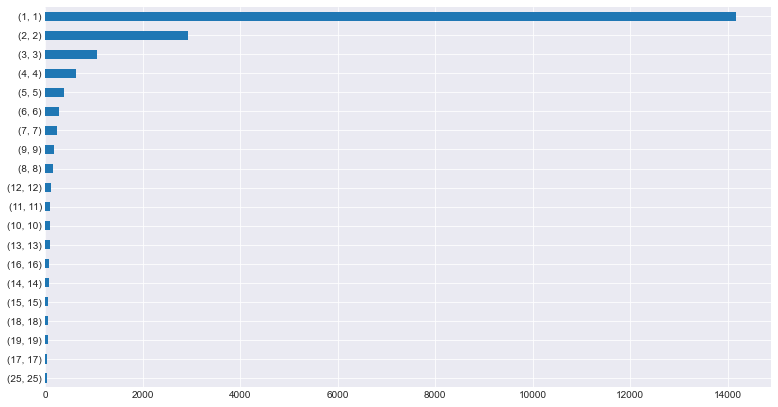

In [32]:
Java_biogram.sort_values(ascending = True).plot.barh()

In [39]:
#word cloud for java
img = WordCloud(background_color='white').generate(' '.join(Java_words))
plt.imshow(img)

TypeError: sequence item 0: expected str instance, int found

<AxesSubplot:>

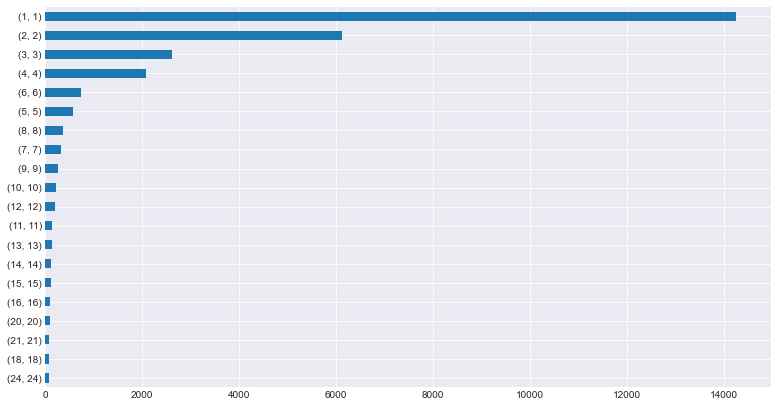

In [40]:
ruby_biogram.sort_values(ascending = True).plot.barh()

In [41]:
#word cloud for ruby
img = WordCloud(background_color='white').generate(' '.join(ruby_words))
plt.imshow(img)

TypeError: sequence item 0: expected str instance, int found

<AxesSubplot:>

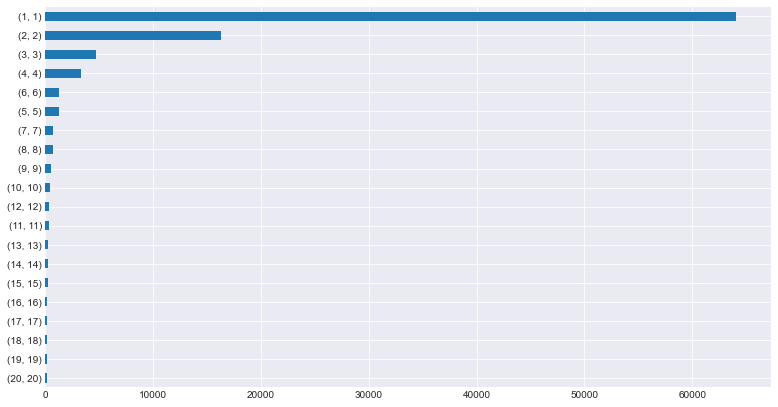

In [42]:
other_biogram.sort_values(ascending = True).plot.barh()

In [43]:
#word cloud for other
img = WordCloud(background_color='white').generate(' '.join(other_words))
plt.imshow(img)

TypeError: sequence item 0: expected str instance, int found